<a href="https://colab.research.google.com/github/lambdabypi/AppliedGenAIIE5374/blob/main/M4_Lab1_GenAI_Triage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; margin-bottom: 20px; text-align: center; border-radius: 10px;">
<h1 style="font-size: 32px; margin-bottom: 10px;">GenAI-Assisted Medical Triage System</h1>
<p style="margin: 0; font-size: 16px;">Enhancing clinical decision support with artificial intelligence</p>
<p style="margin-top: 10px; font-size: 18px; font-weight: bold;">Dr. Dehghani</p>
</div>

<div style="background: #f0f5ff; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">Overview</h2>

<p style="line-height: 1.8; font-size: 16px;">This notebook demonstrates a GenAI-assisted medical triage system with two key components:</p>

<div style="display: flex; flex-wrap: wrap; gap: 15px; margin-top: 15px;">
    <div style="display: flex; align-items: center; background-color: white; padding: 10px 15px; border-radius: 8px; border-left: 3px solid #0055d4;"><span style="font-size: 24px; margin-right: 10px;">👤</span> <span><strong>Patient Generation</strong>: Using Gemini to create synthetic patient profiles</span></div>
    <div style="display: flex; align-items: center; background-color: white; padding: 10px 15px; border-radius: 8px; border-left: 3px solid #0055d4;"><span style="font-size: 24px; margin-right: 10px;">🏥</span> <span><strong>Triage Decision-Making</strong>: Using ChatGPT to evaluate and assign triage levels</span></div>
</div>

<p style="margin-top: 20px; font-style: italic; color: #0055d4;">The system generates patient information, processes it through a triage model, and provides clinical rationale for each decision.</p>

<hr style="margin: 20px 0; border: 0; border-top: 1px solid #ddd;">

<p style="font-size: 14px; color: #666;"><strong style="color: #f39c12;">Note:</strong> This demonstration is for educational purposes only and requires significant modifications for real-world clinical applications.</p>
</div>

<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #e0e0e0;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">Learning Objectives</h2>

<ul style="line-height: 1.8; font-size: 16px;">
<li>Demonstrating the use of GenAI for medical applications</li>
<li>Implementing prompt engineering techniques in healthcare contexts</li>
<li>Integrating multiple AI models (Gemini and ChatGPT) in LangChain</li>
<li>Understanding AI-assisted clinical decision support systems</li>
</ul>
</div>


<div style="margin-bottom: 25px; padding-left: 15px; border-left: 4px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #e0e0e0;">Imports and Setup</h2>

<p style="line-height: 1.6; font-size: 16px; color: #666;">Import necessary libraries and configure API access for Gemini and OpenAI models.</p>
</div>

In [1]:
# 📦 Importing Libraries
import os # Operating system interactions (basic)
import json # Working with JSON data (basic)
import time # Time-related functions (basic)
import random # Generating random numbers (basic)
import pandas as pd # Data manipulation and analysis (major)
import matplotlib.pyplot as plt # Plotting and visualization (major)
import seaborn as sns # Enhanced data visualization (major)
from datetime import datetime # Date and time operations (basic)
from google.colab import userdata # Secure access to Colab user data (Colab specific)
import google.generativeai as genai # Interacting with Google's GenAI models (major)
import openai # Interacting with OpenAI models (major)
from IPython.display import display, Markdown, HTML # Displaying rich output in notebooks (notebook specific)

# Set visual styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 20px;">API Keys Setup</h3>
<p>Configure your API keys for Gemini and OpenAI models. For security, use Colab Secrets whenever possible.</p>
</div>

In [3]:
# 🔑 Get API keys from Colab Secrets
# You need to set these up in your Colab environment under "Secrets"

# Uncomment these lines when running in Colab
openai.api_key = userdata.get('OPENAI_API_KEY')
genai.configure(api_key=userdata.get('GEMINI_API_KEY'))

# For demonstration purposes, you can set keys directly (not recommended for shared notebooks)
# openai.api_key = "your-openai-api-key"
# genai.configure(api_key="your-gemini-api-key")

print("API keys configured successfully.")
# Use API Key name shoud be OPENAI_API_KEY and GEMINI_API_KEY, otherwise please fix it manually on the code

API keys configured successfully.


<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">👨‍⚕️ Patient Generation Functions</h2>
<p style="line-height: 1.6;">These functions use the Gemini model to generate synthetic patient profiles with realistic medical details for emergency department triage simulation.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Key Functions:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>generate_patient()</strong>: Creates synthetic patient data using Gemini's generative AI, including demographics, symptoms, medical history, and vital signs</li>
        <li><strong>format_patient_data()</strong>: Transforms the generated JSON data into a readable format for display</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Triage Classification:</h3>
    <p>The system uses the Emergency Severity Index (ESI) with 5 levels:</p>
    <ol style="padding-left: 20px;">
        <li><span style="color: #ff0000;"><strong>Immediate (Red)</strong></span>: Life-threatening conditions requiring immediate attention</li>
        <li><span style="color: #ff9900;"><strong>Very Urgent (Orange)</strong></span>: Potentially life-threatening, requires rapid assessment</li>
        <li><span style="color: #ffcc00;"><strong>Urgent (Yellow)</strong></span>: Serious but stable condition requiring timely assessment</li>
        <li><span style="color: #00cc00;"><strong>Standard (Green)</strong></span>: Standard cases with no immediate danger</li>
        <li><span style="color: #0099ff;"><strong>Non-Urgent (Blue)</strong></span>: Minor conditions that can safely wait</li>
    </ol>
</div>
<div style="background-color: #fff9e6; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ffc107;">
    <h3 style="color: #996600; margin-top: 0;">Notes on Implementation:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Prompt Design:</strong> The prompt uses a Chain-of-Thought approach to guide the LLM through generating diverse and realistic patient profiles. It includes specific distribution instructions (e.g., 1 in 5 cases should be pediatric) to ensure variety.</li>
        <li><strong>Limitations:</strong> Despite careful prompt engineering, generated data may still exhibit bias and might not perfectly represent all age groups, genders, or medical conditions. Multiple rounds of iteration were needed to improve the prompt, but further enhancements are possible.</li>
        <li><strong>Error Handling:</strong> The code includes robust error handling to manage potential issues with LLM responses, including JSON parsing and formatting challenges.</li>
        <li><strong>Consistency Controls:</strong> The prompt includes instructions to ensure medical history, medications, and vital signs are internally consistent and appropriate for the patient's profile.</li>
        <li><strong>Response Cleaning:</strong> Special processing is needed to extract clean JSON from the LLM response, as models sometimes include markdown formatting or explanatory text.</li>
    </ul>
</div>
</div>

In [4]:
# Define triage levels
TRIAGE_LEVELS = {
    1: "Immediate (Red): Life-threatening conditions requiring immediate attention",
    2: "Very Urgent (Orange): Potentially life-threatening, requires rapid assessment",
    3: "Urgent (Yellow): Serious but stable condition requiring timely assessment",
    4: "Standard (Green): Standard cases with no immediate danger",
    5: "Non-Urgent (Blue): Minor conditions that can safely wait"
}

def generate_patient(patient_id=None):
    if not patient_id:
        patient_id = f"PT-{datetime.now().strftime('%Y%m%d-%H%M')}-{random.randint(1000, 9999)}"

    prompt = f"""
    You are generating synthetic emergency room patients for a simulation.
    To maximize educational value, you must use a chain-of-thought reasoning strategy (internally, not in output) to ensure variety.

    **Chain-of-Thought Planning (do not include in output):**
    1. Randomly select an age group: infant/toddler (0–3), child (4–12), adolescent (13–18), young adult (19–39), adult (40–64), or elderly (65+). Avoid repeating the same age group in consecutive cases.
    2. Randomly select gender.
    3. Randomly select a chief complaint from a broad range: trauma, infection, psychiatric, allergy, pain, minor injury, medication issue, fever, seizure, behavioral, etc. Do not always choose chest pain or shortness of breath, and avoid repeating the same complaint in back-to-back cases. Make sure to include some mild cases as well.
    4. Out of every 5 cases: 1 should be pediatric, 2 should be under 40, 1 should be over 65, and 1 can be any age.
    5. Out of every 5 cases: only 1 should have a cardiac chief complaint (such as chest pain, myocardial infarction, or shortness of breath).
    6. Match medical history, medications, and allergies to the selected age, gender, and chief complaint. Vary these details between cases.
    7. Ensure the pain score and vital signs are consistent with the scenario, and allow for a wide range of values to show diversity.
    8. Occasionally include ambulance arrivals or accident/trauma cases among the generated patients.


    **OUTPUT REQUIREMENT:**
    ONLY return the JSON object below, nothing else.
    Populate all fields with realistic, non-repetitive, internally-consistent values, matching your planning above.

    {{
      "patient_id": "{patient_id}",
      "age": AGE,
      "sex": "GENDER",
      "chief_complaint": "PRIMARY_COMPLAINT",
      "symptoms": ["SYMPTOM1", "SYMPTOM2", ...],
      "medical_history": ["CONDITION1", "CONDITION2", ...],
      "medications": ["MEDICATION1", "MEDICATION2", ...],
      "allergies": ["ALLERGY1", "ALLERGY2", ...],
      "vitals": {{
        "temperature": TEMP_VALUE,
        "heart_rate": HR_VALUE,
        "blood_pressure": "BP_VALUE",
        "respiratory_rate": RR_VALUE,
        "oxygen_saturation": O2_VALUE
      }},
      "pain_score": PAIN_LEVEL
    }}
    """

    try:
        gemini_model = genai.GenerativeModel('models/gemini-2.0-flash')
        response = gemini_model.generate_content(prompt)
        response_text = response.text.strip()

        # Remove code block markers if present
        if response_text.startswith("```json"):
            response_text = response_text[7:]
        if response_text.startswith("```"):
            response_text = response_text[3:]
        if "```" in response_text:
            response_text = response_text.split("```")[0]

        # Find the first JSON object in the response
        json_start = response_text.find('{')
        json_end = response_text.find('}', json_start)  # Find the first closing }
        bracket_count = 0
        for i, c in enumerate(response_text[json_start:], start=json_start):
            if c == '{':
                bracket_count += 1
            elif c == '}':
                bracket_count -= 1
                if bracket_count == 0:
                    json_end = i + 1
                    break

        if json_start >= 0 and json_end > json_start:
            json_content = response_text[json_start:json_end]
            patient_data = json.loads(json_content)
            return patient_data
        else:
            raise ValueError("Could not extract valid JSON from Gemini response")

    except Exception as e:
        return f"❌ LLM did not respond properly: {e}"



# Function to convert patient data to a readable format
def format_patient_data(patient):
    """
    Formats patient data for display

    Args:
        patient: Dictionary containing patient information

    Returns:
        str: Formatted patient information
    """
    formatted = f"""
    ## Patient ID: {patient['patient_id']}

    **Demographics:** {patient['age']}-year-old {patient['sex']}
    **Chief Complaint:** {patient['chief_complaint']}

    **Symptoms:**
    - {', '.join(patient['symptoms'])}

    **Medical History:**
    - {', '.join(patient['medical_history'])}

    **Medications:**
    - {', '.join(patient['medications'])}

    **Allergies:**
    - {', '.join(patient['allergies'])}

    **Vitals:**
    - Temperature: {patient['vitals']['temperature']}°F
    - Heart Rate: {patient['vitals']['heart_rate']} bpm
    - Blood Pressure: {patient['vitals']['blood_pressure']}
    - Respiratory Rate: {patient['vitals']['respiratory_rate']} breaths/min
    - Oxygen Saturation: {patient['vitals']['oxygen_saturation']}%

    **Pain Score:** {patient['pain_score']}/10
    """
    return formatted

In [5]:
# Generate 2 patients and display them
for i in range(1):
    print(f"\n{'='*50}\nGENERATING PATIENT #{i+1}\n{'='*50}")
    patient = generate_patient()

    # Check if we received an error message
    if isinstance(patient, str):
        print(patient)
    else:
        print(format_patient_data(patient))


GENERATING PATIENT #1

    ## Patient ID: PT-20250922-1751-3445

    **Demographics:** 52-year-old Male
    **Chief Complaint:** Right ankle pain

    **Symptoms:**
    - Swelling of right ankle, Difficulty bearing weight, Bruising around ankle, Pain with movement

    **Medical History:**
    - Hypertension, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Atorvastatin 40mg daily, Ibuprofen 200mg PRN

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.9°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 142/88
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 7/10
    


<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">🚑 AI-Powered Triage Decision System</h2>
<p style="line-height: 1.6;">This system uses OpenAI's GPT-4o model to evaluate patient information and recommend appropriate triage levels based on the Emergency Severity Index (ESI).</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Key Functions:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>triage_patient()</strong>: Analyzes patient data using GPT-4o to determine appropriate triage level, confidence score, rationale, and recommended actions</li>
        <li><strong>format_triage_results()</strong>: Creates a color-coded visual representation of the triage decision with clinical rationale</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">How It Works:</h3>
    <ol style="padding-left: 20px;">
        <li>Patient data is converted to a structured text format</li>
        <li>A specialized prompt instructs the LLM to act as an experienced emergency triage nurse</li>
        <li>The system provides the ESI triage scale definitions (Levels 1-5)</li>
        <li>GPT-4o analyzes the patient information and returns a structured JSON response</li>
        <li>Response includes triage level, confidence score, clinical rationale, and recommended actions</li>
        <li>Error handling ensures a fallback triage decision (Level 3) if the API fails</li>
        <li>Results are formatted with color-coding based on severity level</li>
    </ol>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Prompt Design:</h3>
    <p>The prompt is carefully engineered to:</p>
    <ul style="padding-left: 20px;">
        <li>Establish the context (emergency triage nurse role)</li>
        <li>Provide clear definitions of each triage level</li>
        <li>Present structured patient information</li>
        <li>Request specific output format with triage level, confidence, rationale, and recommendations</li>
        <li>Emphasize evidence-based decision making considering vitals, symptoms, and medical history</li>
    </ul>
</div>
<div style="background-color: #fff0f0; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ff6b6b;">
    <h3 style="color: #d32f2f; margin-top: 0;">⚠️ Important Limitations:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Confidence Level Accuracy:</strong> The confidence scores provided by the LLM may not accurately reflect actual clinical certainty. These values tend to be arbitrarily high and should not be solely relied upon for determining decision quality.</li>
        <li><strong>Clinical Validation Required:</strong> All LLM-based triage decisions must be validated by qualified healthcare professionals before application in any clinical setting. This system is for research and educational purposes only.</li>
        <li><strong>Potential Bias:</strong> The LLM may exhibit biases in its decision-making process based on its training data, potentially leading to systematic disparities in triage recommendations for different demographic groups.</li>
        <li><strong>Incomplete Information Handling:</strong> The system has limited ability to request additional information that would be standard in real triage scenarios, potentially leading to suboptimal decisions when critical data is missing.</li>
    </ul>
</div>
</div>

In [6]:
def triage_patient(patient_data):
    """
    Determine triage level using OpenAI's ChatGPT

    Args:
        patient_data: Dictionary containing patient information

    Returns:
        dict: Triage decision including level, confidence, and rationale
    """
    # Convert patient data to text format for the prompt
    patient_text = json.dumps(patient_data, indent=2)

    # Create prompt for OpenAI
    prompt = f"""
    You are an experienced emergency department triage nurse.
    Based on the following patient information, assign an appropriate triage level using the Emergency Severity Index (ESI) from 1-5:

    - Level 1 (Immediate/Red): Life-threatening conditions requiring immediate treatment
    - Level 2 (Very Urgent/Orange): High risk, potentially life-threatening, rapid assessment needed
    - Level 3 (Urgent/Yellow): Serious but stable condition, requires timely assessment
    - Level 4 (Standard/Green): Standard cases, no immediate danger
    - Level 5 (Non-Urgent/Blue): Minor conditions that can safely wait

    PATIENT INFORMATION:
    {patient_text}

    Provide your assessment in the following JSON format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE_0_TO_1,
      "rationale": "DETAILED_CLINICAL_RATIONALE",
      "recommended_actions": ["ACTION1", "ACTION2", ...]
    }}

    Ensure your triage decision is evidence-based and considers the patient's vitals, symptoms, and medical history.
    """

    try:
        # Call OpenAI API
        response = openai.chat.completions.create(
            model="gpt-4o",  # or gpt-3.5-turbo
            messages=[
                {"role": "system", "content": "You are an experienced emergency medicine triage nurse. Provide accurate, evidence-based triage decisions."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=1000
        )

        # Extract the response text
        response_text = response.choices[0].message.content

        # Find JSON content (between curly braces)
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > 0:
            json_content = response_text[json_start:json_end]
            triage_decision = json.loads(json_content)
            return triage_decision
        else:
            raise ValueError("Could not extract valid JSON from API response")

    except Exception as e:
        print(f"Error in triage decision: {e}")
        # Return fallback triage data
        return {
            "triage_level": 3,
            "triage_category": "Urgent (Yellow)",
            "confidence": 0.75,
            "rationale": "Fallback triage decision due to API error",
            "recommended_actions": ["Assessment by physician", "Vital signs monitoring"]
        }

# Function to format triage results
def format_triage_results(triage_result):
    """
    Formats triage results for display

    Args:
        triage_result: Dictionary containing triage decision

    Returns:
        str: Formatted triage decision
    """
    # Define color mapping for triage levels
    triage_colors = {
        1: "#ff0000",  # Red
        2: "#ff9900",  # Orange
        3: "#ffff00",  # Yellow
        4: "#00cc00",  # Green
        5: "#0099ff"   # Blue
    }

    level = triage_result['triage_level']
    color = triage_colors.get(level, "#999999")

    formatted = f"""
    ## Triage Decision

    <div style="background-color: {color}; color: {'white' if level <= 2 else 'black'}; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h3>Level {level}: {triage_result['triage_category']}</h3>
    <p><strong>Confidence:</strong> {triage_result['confidence']*100:.1f}%</p>
    </div>

    **Clinical Rationale:**
    {triage_result['rationale']}

    **Recommended Actions:**
    - {', '.join(triage_result['recommended_actions'])}
    """
    return formatted

<div style="background: linear-gradient(135deg, #e6f7ff 0%, #d1edff 100%); border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0066cc;">
<h2 style="color: #0066cc; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0066cc;">🔬 Triage Experiment Runner</h2>
<p style="line-height: 1.6;">The <code>run_triage_experiment()</code> function coordinates the end-to-end triage simulation process, from patient generation to result analysis.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0066cc; margin-top: 0;">Key Features:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>Batch Processing:</strong> Handles multiple patient cases (default: 10) in sequence</li>
        <li><strong>Performance Tracking:</strong> Measures and records time spent on patient generation and triage</li>
        <li><strong>Visualization:</strong> Displays formatted patient data and color-coded triage decisions</li>
        <li><strong>Data Collection:</strong> Compiles demographics and triage results into a structured DataFrame</li>
    </ul>
</div>
<div style="background-color: #f0f8ff; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #0066cc;">
    <h3 style="color: #0055aa; margin-top: 0;">Usage Notes:</h3>
    <p style="margin-bottom: 8px;">Control the experiment with these parameters:</p>
    <ul style="padding-left: 20px; margin-bottom: 0;">
        <li><code>num_patients</code>: Set the sample size (higher values provide better distribution analysis)</li>
        <li><code>verbose</code>: Enable/disable detailed output for each patient case</li>
    </ul>
</div>
</div>

In [7]:
def run_triage_experiment(num_patients=10, verbose=True):
    """
    Run the triage experiment for a specified number of patients

    Args:
        num_patients: Number of synthetic patients to generate and triage
        verbose: Whether to display detailed information for each patient

    Returns:
        DataFrame: Results of all triage decisions
    """
    results = []

    print(f"Starting GenAI-Assisted Medical Triage Experiment with {num_patients} patients")
    print("=" * 80)

    for i in range(num_patients):
        print(f"\nProcessing Patient {i+1}/{num_patients}...")

        # Generate patient data
        start_time = time.time()
        patient = generate_patient()
        patient_gen_time = time.time() - start_time

        # Perform triage decision
        start_time = time.time()
        triage_decision = triage_patient(patient)
        triage_time = time.time() - start_time

        # Store results
        results.append({
            "patient_id": patient["patient_id"],
            "age": patient["age"],
            "sex": patient["sex"],
            "chief_complaint": patient["chief_complaint"],
            "triage_level": triage_decision["triage_level"],
            "triage_category": triage_decision["triage_category"],
            "confidence": triage_decision["confidence"],
            "patient_gen_time": patient_gen_time,
            "triage_time": triage_time
        })

        # Display verbose output if requested
        if verbose:
            display(Markdown(format_patient_data(patient)))
            display(HTML(format_triage_results(triage_decision)))
            print("-" * 80)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    print("\nExperiment completed successfully!")
    return results_df

<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 20px;">📊 Results Analysis</h3>
<p>This function analyzes and visualizes the experiment results with charts and statistics.</p>
</div>

In [8]:
def analyze_results(results_df):
    """
    Analyze and visualize the results of the triage experiment

    Args:
        results_df: DataFrame containing experiment results

    Returns:
        None (displays visualizations)
    """
    # Print summary statistics
    print("\n=== Triage Experiment Summary ===\n")
    print(f"Total patients processed: {len(results_df)}")

    # Distribution of triage levels
    level_counts = results_df['triage_level'].value_counts().sort_index()

    print("\nTriage Level Distribution:")
    for level, count in level_counts.items():
        print(f"Level {level} ({TRIAGE_LEVELS[level].split(':')[0]}): {count} patients ({count/len(results_df)*100:.1f}%)")

    # Average processing times
    print(f"\nAverage patient generation time: {results_df['patient_gen_time'].mean():.2f} seconds")
    print(f"Average triage decision time: {results_df['triage_time'].mean():.2f} seconds")
    print(f"Total average processing time per patient: {(results_df['patient_gen_time'] + results_df['triage_time']).mean():.2f} seconds")

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # Triage level distribution
    plt.subplot(2, 2, 1)
    colors = ['#ff0000', '#ff9900', '#ffff00', '#00cc00', '#0099ff']
    bars = plt.bar(level_counts.index, level_counts.values, color=[colors[i-1] for i in level_counts.index])
    plt.title('Distribution of Triage Levels')
    plt.xlabel('Triage Level')
    plt.ylabel('Number of Patients')
    plt.xticks(level_counts.index)

    # Add percentage labels to bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height/len(results_df)*100:.1f}%', ha='center')

    # Age distribution by triage level
    plt.subplot(2, 2, 2)
    sns.boxplot(x='triage_level', y='age', data=results_df, palette=colors[:len(level_counts)])
    plt.title('Age Distribution by Triage Level')
    plt.xlabel('Triage Level')
    plt.ylabel('Age')

    # Confidence scores by triage level
    plt.subplot(2, 2, 3)
    sns.boxplot(x='triage_level', y='confidence', data=results_df, palette=colors[:len(level_counts)])
    plt.title('Confidence Scores by Triage Level')
    plt.xlabel('Triage Level')
    plt.ylabel('Confidence Score')
    plt.ylim(0, 1)

    # Processing time
    plt.subplot(2, 2, 4)
    time_data = pd.DataFrame({
        'Patient Generation': results_df['patient_gen_time'],
        'Triage Decision': results_df['triage_time']
    })
    time_data.plot(kind='bar', stacked=True, ax=plt.gca(), figsize=(10, 6))
    plt.title('Processing Time by Patient')
    plt.xlabel('Patient Index')
    plt.ylabel('Time (seconds)')
    plt.xticks([])
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # Display final conclusions
    print("\n=== Key Findings ===")
    most_common_level = level_counts.idxmax()
    print(f"- Most common triage level: Level {most_common_level} ({TRIAGE_LEVELS[most_common_level].split(':')[0]})")
    print(f"- Average model confidence: {results_df['confidence'].mean()*100:.1f}%")
    print(f"- Gender distribution: {results_df['sex'].value_counts().to_dict()}")

    # Chief complaints analysis
    complaints = results_df['chief_complaint'].value_counts()
    print(f"- Top chief complaints: {', '.join(complaints.index[:3])}")

    # Efficiency assessment
    print(f"- Total processing time for all {len(results_df)} patients: {results_df['patient_gen_time'].sum() + results_df['triage_time'].sum():.2f} seconds")

<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">▶️ Execute the Experiment</h2>

<p style="line-height: 1.6;">Run this cell to execute the triage experiment with 10 synthetic patients.</p>
<p><strong>Note:</strong> This will make API calls to both Gemini and OpenAI which may incur charges based on your usage tiers.</p>

<ul style="padding-left: 25px; margin-top: 15px; color: #555;">
  <li><strong>Execution time:</strong> The complete experiment typically takes 3-5 minutes to run depending on API response times</li>
  <li><strong>Output:</strong> Results will be stored in the <code>experiment_results</code> variable for further analysis</li>
</ul>
</div>

Starting GenAI-Assisted Medical Triage Experiment with 10 patients

Processing Patient 1/10...



    ## Patient ID: PT-20250922-1753-8635

    **Demographics:** 5-year-old Male
    **Chief Complaint:** Ear pain

    **Symptoms:**
    - Ear pain, right ear, Fever, Irritability, Pulling at ear

    **Medical History:**
    - Asthma, History of ear infections

    **Medications:**
    - Albuterol inhaler (as needed)

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 102.4°F
    - Heart Rate: 110 bpm
    - Blood Pressure: 95/60
    - Respiratory Rate: 24 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 6/10
    

--------------------------------------------------------------------------------

Processing Patient 2/10...



    ## Patient ID: PT-20241027-0822-4578

    **Demographics:** 28-year-old Male
    **Chief Complaint:** Ankle Injury

    **Symptoms:**
    - Right ankle pain, Swelling, Difficulty bearing weight

    **Medical History:**
    - None

    **Medications:**
    - None

    **Allergies:**
    - None

    **Vitals:**
    - Temperature: 98.9°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 130/80
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 3/10...



    ## Patient ID: PT-20241027-0932-2957

    **Demographics:** 52-year-old Male
    **Chief Complaint:** Abdominal Pain

    **Symptoms:**
    - Severe abdominal cramping, Nausea, Vomiting, Diarrhea, Loss of appetite

    **Medical History:**
    - Hypertension, GERD, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Omeprazole 20mg daily, Atorvastatin 40mg daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 100.8°F
    - Heart Rate: 105 bpm
    - Blood Pressure: 145/90
    - Respiratory Rate: 22 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 8/10
    

--------------------------------------------------------------------------------

Processing Patient 4/10...



    ## Patient ID: PT-20250922-1754-3439

    **Demographics:** 5-year-old Male
    **Chief Complaint:** Fever and ear pain

    **Symptoms:**
    - Ear pain (right ear), Fever, Irritability, Decreased appetite, Nasal congestion

    **Medical History:**
    - No significant medical history, Recurrent ear infections

    **Medications:**
    - Amoxicillin (started today), Ibuprofen as needed for fever

    **Allergies:**
    - No known drug allergies

    **Vitals:**
    - Temperature: 102.5°F
    - Heart Rate: 110 bpm
    - Blood Pressure: 90/60
    - Respiratory Rate: 24 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 6/10
    

--------------------------------------------------------------------------------

Processing Patient 5/10...



    ## Patient ID: PT-20250922-1754-2764

    **Demographics:** 52-year-old Male
    **Chief Complaint:** Severe abdominal pain

    **Symptoms:**
    - Sudden onset abdominal pain, Nausea, Vomiting, Abdominal distension, Diaphoresis

    **Medical History:**
    - Hypertension, Type 2 Diabetes, GERD

    **Medications:**
    - Metformin 500mg BID, Lisinopril 20mg daily, Omeprazole 20mg daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 99.2°F
    - Heart Rate: 112 bpm
    - Blood Pressure: 160/95
    - Respiratory Rate: 24 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 8/10
    

--------------------------------------------------------------------------------

Processing Patient 6/10...



    ## Patient ID: PT-20250922-1755-7004

    **Demographics:** 47-year-old Male
    **Chief Complaint:** Right ankle pain after fall

    **Symptoms:**
    - Swelling of right ankle, Inability to bear weight on right leg, Bruising around ankle joint

    **Medical History:**
    - Hypertension, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Atorvastatin 40mg daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.8°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 142/88
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 7/10...



    ## Patient ID: PT-20250922-1754-8984

    **Demographics:** 52-year-old Female
    **Chief Complaint:** Right ankle pain

    **Symptoms:**
    - Right ankle swelling, Difficulty bearing weight on right ankle, Bruising around ankle

    **Medical History:**
    - Hypertension, Osteoarthritis (right knee)

    **Medications:**
    - Lisinopril 20mg daily, Ibuprofen 200mg PRN for pain

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.8°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 142/88
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 8/10...



    ## Patient ID: PT-20241027-0832-4287

    **Demographics:** 5-year-old Male
    **Chief Complaint:** Fever and ear pain

    **Symptoms:**
    - Ear pain (right ear), Fever, Irritability, Decreased appetite, Pulling at ear

    **Medical History:**
    - None

    **Medications:**
    - Amoxicillin (parent reported, just started today)

    **Allergies:**
    - None Known

    **Vitals:**
    - Temperature: 102.8°F
    - Heart Rate: 110 bpm
    - Blood Pressure: 95/60
    - Respiratory Rate: 24 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 6/10
    

--------------------------------------------------------------------------------

Processing Patient 9/10...



    ## Patient ID: PT-20231027-0932-9876

    **Demographics:** 68-year-old Male
    **Chief Complaint:** Lower back pain

    **Symptoms:**
    - Sharp pain in lower back, Pain radiating down left leg, Difficulty walking, Numbness in left foot

    **Medical History:**
    - Osteoarthritis, Hypertension, Hyperlipidemia, Previous lumbar strain

    **Medications:**
    - Lisinopril 20mg daily, Atorvastatin 40mg daily, Acetaminophen 500mg PRN

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.2°F
    - Heart Rate: 82 bpm
    - Blood Pressure: 148/88
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 10/10...



    ## Patient ID: PT-20250922-1754-9260

    **Demographics:** 47-year-old Male
    **Chief Complaint:** Back pain after lifting heavy object

    **Symptoms:**
    - Lower back pain, Muscle spasms, Difficulty bending over, Numbness in left leg

    **Medical History:**
    - Hypertension, Osteoarthritis

    **Medications:**
    - Lisinopril 20mg daily, Ibuprofen 200mg PRN

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.9°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 142/90
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Experiment completed successfully!

=== Triage Experiment Summary ===

Total patients processed: 10

Triage Level Distribution:
Level 2 (Very Urgent (Orange)): 3 patients (30.0%)
Level 3 (Urgent (Yellow)): 5 patients (50.0%)
Level 4 (Standard (Green)): 2 patients (20.0%)

Average patient generation time: 2.10 seconds
Average triage decision time: 7.13 seconds
Total average processing time per patient: 9.23 seconds


/tmp/ipython-input-2058656404.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='age', data=results_df, palette=colors[:len(level_counts)])
/tmp/ipython-input-2058656404.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='confidence', data=results_df, palette=colors[:len(level_counts)])


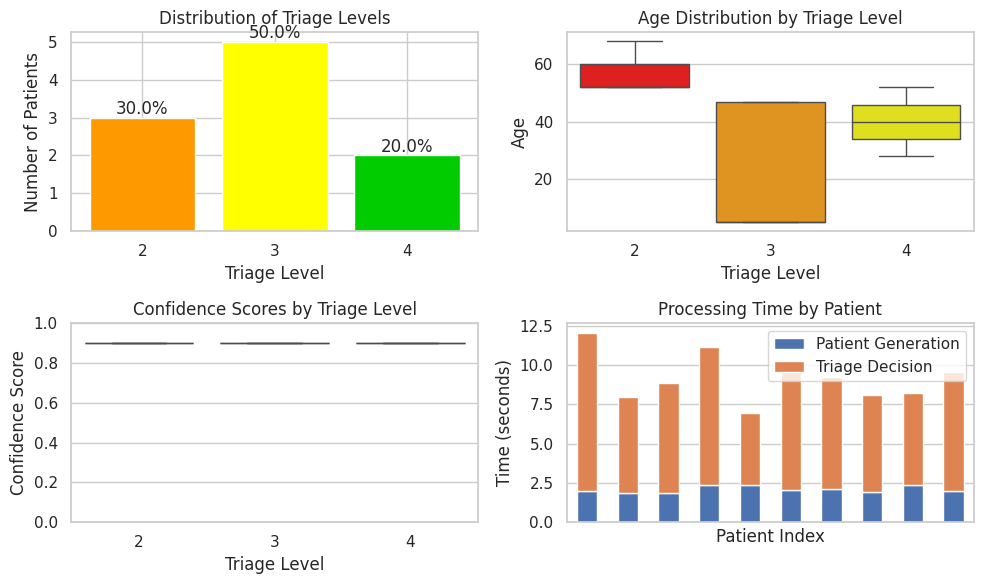


=== Key Findings ===
- Most common triage level: Level 3 (Urgent (Yellow))
- Average model confidence: 90.0%
- Gender distribution: {'Male': 9, 'Female': 1}
- Top chief complaints: Fever and ear pain, Ear pain, Ankle Injury
- Total processing time for all 10 patients: 92.27 seconds


In [9]:
# Run the experiment with 10 synthetic patients
# Uncomment to run the experiment
results = run_triage_experiment(num_patients=10, verbose=True)
analyze_results(results)


<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; margin-top: 30px; text-align: center; border-radius: 10px;">
<h2 style="margin-top: 0;">Conclusion</h2>

<div style="background: white; border-radius: 12px; padding: 20px; margin-top: 20px; color: #333; text-align: left;">
<p>This notebook demonstrates how generative AI can be applied to healthcare triage systems:</p>

<ol>
    <li><strong>Patient Generation:</strong> Gemini successfully creates diverse, medically coherent patient profiles.</li>
    <li><strong>Triage Decision-Making:</strong> ChatGPT effectively analyzes patient data and assigns appropriate triage levels with clinical rationale.</li>
    <li><strong>Analysis:</strong> The system provides insights into triage distribution, processing efficiency, and decision confidence.</li>
</ol>

<h3 style="color: #0055d4;">Future Enhancements</h3>
<ul>
    <li>Integrate with electronic health record systems</li>
    <li>Add validation against expert clinician decisions</li>
    <li>Expand to specialty-specific triage protocols</li>
    <li>Implement real-time monitoring dashboard</li>
</ul>

<h3 style="color: #0055d4;">Limitations</h3>
<ul>
    <li>Model outputs should always be verified by healthcare professionals</li>
    <li>Clinical accuracy depends on prompt design and model capabilities</li>
    <li>System requires rigorous testing before clinical implementation</li>
</ul>

<p style="font-style: italic; margin-top: 20px; color: #0055d4;">This laboratory exercise demonstrates the potential of GenAI to accelerate healthcare innovation while maintaining clinical rigor and patient safety.</p>
</div>
</div>

<div style="background: linear-gradient(135deg, #fff0e0 0%, #ffe6cc 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #ff9933;">
<h2 style="color: #cc6600; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #cc6600;">👥 Human-in-the-Loop Triage Integration</h2>
<p style="line-height: 1.6;">The updated triage system now incorporates healthcare provider expertise through a human-in-the-loop approach, ensuring critical oversight of AI decisions.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Key Enhancements:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>Confidence Threshold:</strong> The system now uses a 95% confidence threshold to identify uncertain decisions</li>
        <li><strong>Interactive Confirmation:</strong> Healthcare providers review and can override AI suggestions</li>
        <li><strong>Decision Documentation:</strong> The system records whether the provider confirmed or modified the AI recommendation</li>
        <li><strong>Full Transparency:</strong> Providers see complete patient information and AI reasoning before making decisions</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Workflow Process:</h3>
    <ol style="padding-left: 20px;">
        <li>AI analyzes patient data and assigns a preliminary triage level</li>
        <li>System displays patient information and AI's assessment to the healthcare provider</li>
        <li>If AI confidence is below 95%, a warning is prominently displayed</li>
        <li>Provider reviews the suggestion and selects the final triage level</li>
        <li>The system documents whether the provider confirmed or changed the AI recommendation</li>
        <li>Final triage decision receives 100% confidence as it has been validated by a healthcare professional</li>
    </ol>
</div>
<div style="background-color: #fff9e6; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ff9933;">
    <h3 style="color: #cc6600; margin-top: 0;">Clinical Benefits:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Safety Enhancement:</strong> Prevents over-reliance on AI by requiring human verification</li>
        <li><strong>Knowledge Transfer:</strong> Clinicians can learn from AI suggestions while applying their expertise</li>
        <li><strong>Audit Trail:</strong> Creates documentation of decision-making process for quality improvement</li>
        <li><strong>Continuous Improvement:</strong> System can track agreement rates between AI and providers to identify patterns</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Implementation Highlights:</h3>
    <pre style="background-color: #f8f8f8; padding: 10px; border-radius: 4px; font-size: 12px; overflow-x: auto; margin: 0;">
# Key code updates:
if triage_decision["confidence"] < confidence_threshold:
    print(f"⚠️ ATTENTION: AI confidence ({triage_decision['confidence']*100:.1f}%) is below threshold")


In [10]:
def triage_patient(patient_data, confidence_threshold=0.95):
    """
    Determine triage level using OpenAI's ChatGPT

    Args:
        patient_data: Dictionary containing patient information
        confidence_threshold: Minimum confidence level required (default: 0.95)

    Returns:
        dict: Triage decision including level, confidence, and rationale
    """
    # Convert patient data to text format for the prompt
    patient_text = json.dumps(patient_data, indent=2)

    # Create prompt for OpenAI
    prompt = f"""
    You are an experienced emergency department triage nurse.
    Based on the following patient information, assign an appropriate triage level using the Emergency Severity Index (ESI) from 1-5:

    - Level 1 (Immediate/Red): Life-threatening conditions requiring immediate treatment
    - Level 2 (Very Urgent/Orange): High risk, potentially life-threatening, rapid assessment needed
    - Level 3 (Urgent/Yellow): Serious but stable condition, requires timely assessment
    - Level 4 (Standard/Green): Standard cases, no immediate danger
    - Level 5 (Non-Urgent/Blue): Minor conditions that can safely wait

    PATIENT INFORMATION:
    {patient_text}

    Provide your assessment in the following JSON format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE_0_TO_1,
      "rationale": "DETAILED_CLINICAL_RATIONALE",
      "recommended_actions": ["ACTION1", "ACTION2", ...]
    }}

    Ensure your triage decision is evidence-based and considers the patient's vitals, symptoms, and medical history.
    """

    try:
        # Call OpenAI API
        response = openai.chat.completions.create(
            model="gpt-4o",  # or gpt-3.5-turbo
            messages=[
                {"role": "system", "content": "You are an experienced emergency medicine triage nurse. Provide accurate, evidence-based triage decisions."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=1000
        )

        # Extract the response text
        response_text = response.choices[0].message.content

        # Find JSON content (between curly braces)
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > 0:
            json_content = response_text[json_start:json_end]
            triage_decision = json.loads(json_content)

            # Always present patient information and request user confirmation
            print("\n==== PATIENT INFORMATION ====")
            print(patient_text)
            print("\n==== AI TRIAGE SUGGESTION ====")
            print(f"Level {triage_decision['triage_level']}: {triage_decision['triage_category']}")
            print(f"Confidence: {triage_decision['confidence']*100:.1f}%")
            print(f"Rationale: {triage_decision['rationale']}")

            # Highlight if confidence is below threshold
            if triage_decision["confidence"] < confidence_threshold:
                print(f"\n⚠️ ATTENTION: AI confidence ({triage_decision['confidence']*100:.1f}%) is below threshold ({confidence_threshold*100:.0f}%)")

            # Get user input using dropdown-like interface
            print("\nPlease confirm or adjust the triage level:")
            print("1: Immediate/Red - Life-threatening conditions requiring immediate treatment")
            print("2: Very Urgent/Orange - High risk, potentially life-threatening, rapid assessment needed")
            print("3: Urgent/Yellow - Serious but stable condition, requires timely assessment")
            print("4: Standard/Green - Standard cases, no immediate danger")
            print("5: Non-Urgent/Blue - Minor conditions that can safely wait")

            while True:
                try:
                    user_level = int(input(f"Enter triage level (1-5) [AI suggested: {triage_decision['triage_level']}]: "))
                    if 1 <= user_level <= 5:
                        # Update triage level based on user input
                        triage_categories = {
                            1: "Immediate (Red)",
                            2: "Very Urgent (Orange)",
                            3: "Urgent (Yellow)",
                            4: "Standard (Green)",
                            5: "Non-Urgent (Blue)"
                        }

                        # Record if user changed the AI suggestion
                        if user_level != triage_decision['triage_level']:
                            original_level = triage_decision['triage_level']
                            original_category = triage_decision['triage_category']

                            triage_decision["triage_level"] = user_level
                            triage_decision["triage_category"] = triage_categories[user_level]
                            triage_decision["confidence"] = 1.0  # Set confidence to 100% for user decisions
                            triage_decision["rationale"] += f"\n\nNote: Healthcare provider changed triage level from AI-suggested Level {original_level} ({original_category}) to Level {user_level} ({triage_categories[user_level]})."
                        else:
                            # User confirmed AI suggestion
                            triage_decision["confidence"] = 1.0  # Set confidence to 100% for confirmed decisions
                            triage_decision["rationale"] += "\n\nNote: AI-suggested triage level was confirmed by healthcare provider."
                        break
                    else:
                        print("Invalid input. Please enter a number between 1 and 5.")
                except ValueError:
                    print("Invalid input. Please enter a number between 1 and 5.")

            return triage_decision
        else:
            raise ValueError("Could not extract valid JSON from API response")

    except Exception as e:
        print(f"Error in triage decision: {e}")
        # Return fallback triage data
        return {
            "triage_level": 3,
            "triage_category": "Urgent (Yellow)",
            "confidence": 0.75,
            "rationale": "Fallback triage decision due to API error",
            "recommended_actions": ["Assessment by physician", "Vital signs monitoring"]
        }


Starting GenAI-Assisted Medical Triage Experiment with 3 patients

Processing Patient 1/3...

==== PATIENT INFORMATION ====
{
  "patient_id": "PT-20250922-1757-9876",
  "age": 72,
  "sex": "Male",
  "chief_complaint": "Right hip pain after a fall",
  "symptoms": [
    "Right hip pain, inability to bear weight",
    "Swelling and bruising around the right hip",
    "Dizziness"
  ],
  "medical_history": [
    "Hypertension",
    "Osteoarthritis",
    "Previous stroke with residual weakness on the left side",
    "Hyperlipidemia"
  ],
  "medications": [
    "Aspirin 81mg daily",
    "Lisinopril 20mg daily",
    "Atorvastatin 40mg daily",
    "Acetaminophen 500mg PRN for pain"
  ],
  "allergies": [
    "Penicillin"
  ],
  "vitals": {
    "temperature": 98.2,
    "heart_rate": 88,
    "blood_pressure": "150/80",
    "respiratory_rate": 18,
    "oxygen_saturation": 95
  },
  "pain_score": 7
}

==== AI TRIAGE SUGGESTION ====
Level 2: Very Urgent/Orange
Confidence: 90.0%
Rationale: The patient


    ## Patient ID: PT-20250922-1757-9876

    **Demographics:** 72-year-old Male
    **Chief Complaint:** Right hip pain after a fall

    **Symptoms:**
    - Right hip pain, inability to bear weight, Swelling and bruising around the right hip, Dizziness

    **Medical History:**
    - Hypertension, Osteoarthritis, Previous stroke with residual weakness on the left side, Hyperlipidemia

    **Medications:**
    - Aspirin 81mg daily, Lisinopril 20mg daily, Atorvastatin 40mg daily, Acetaminophen 500mg PRN for pain

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.2°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 150/80
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 95%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 2/3...

==== PATIENT INFORMATION ====
{
  "patient_id": "PT-20231027-0935-2248",
  "age": 10,
  "sex": "Male",
  "chief_complaint": "Abdominal pain",
  "symptoms": [
    "Fever",
    "Vomiting",
    "Decreased appetite",
    "Guarding abdomen"
  ],
  "medical_history": [
    "Asthma"
  ],
  "medications": [
    "Albuterol inhaler (as needed)"
  ],
  "allergies": [
    "Penicillin"
  ],
  "vitals": {
    "temperature": 38.9,
    "heart_rate": 110,
    "blood_pressure": "105/65",
    "respiratory_rate": 24,
    "oxygen_saturation": 98
  },
  "pain_score": 6
}

==== AI TRIAGE SUGGESTION ====
Level 2: Very Urgent/Orange
Confidence: 90.0%
Rationale: The patient is a 10-year-old male presenting with abdominal pain, fever, vomiting, decreased appetite, and guarding of the abdomen. These symptoms, particularly the guarding, suggest a potential surgical abdomen, such as appendicitis, which can b


    ## Patient ID: PT-20231027-0935-2248

    **Demographics:** 10-year-old Male
    **Chief Complaint:** Abdominal pain

    **Symptoms:**
    - Fever, Vomiting, Decreased appetite, Guarding abdomen

    **Medical History:**
    - Asthma

    **Medications:**
    - Albuterol inhaler (as needed)

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 38.9°F
    - Heart Rate: 110 bpm
    - Blood Pressure: 105/65
    - Respiratory Rate: 24 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 6/10
    

--------------------------------------------------------------------------------

Processing Patient 3/3...

==== PATIENT INFORMATION ====
{
  "patient_id": "PT-20250922-1759-6842",
  "age": 52,
  "sex": "Male",
  "chief_complaint": "Right knee pain and swelling",
  "symptoms": [
    "Knee pain, especially with weight-bearing",
    "Swelling around the knee joint",
    "Stiffness in the knee",
    "Clicking sensation in the knee"
  ],
  "medical_history": [
    "Osteoarthritis",
    "Hypertension",
    "Hyperlipidemia"
  ],
  "medications": [
    "Lisinopril 20mg daily",
    "Atorvastatin 40mg daily",
    "Ibuprofen 200mg PRN for pain"
  ],
  "allergies": [
    "Penicillin"
  ],
  "vitals": {
    "temperature": 98.9,
    "heart_rate": 84,
    "blood_pressure": "142/88",
    "respiratory_rate": 16,
    "oxygen_saturation": 97
  },
  "pain_score": 7
}

==== AI TRIAGE SUGGESTION ====
Level 3: Urgent/Yellow
Confidence: 90.0%
Rationale: The patient is experiencing significant knee pain with


    ## Patient ID: PT-20250922-1759-6842

    **Demographics:** 52-year-old Male
    **Chief Complaint:** Right knee pain and swelling

    **Symptoms:**
    - Knee pain, especially with weight-bearing, Swelling around the knee joint, Stiffness in the knee, Clicking sensation in the knee

    **Medical History:**
    - Osteoarthritis, Hypertension, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Atorvastatin 40mg daily, Ibuprofen 200mg PRN for pain

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.9°F
    - Heart Rate: 84 bpm
    - Blood Pressure: 142/88
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Experiment completed successfully!

=== Triage Experiment Summary ===

Total patients processed: 3

Triage Level Distribution:
Level 2 (Very Urgent (Orange)): 3 patients (100.0%)

Average patient generation time: 2.37 seconds
Average triage decision time: 48.04 seconds
Total average processing time per patient: 50.41 seconds


/tmp/ipython-input-2058656404.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='age', data=results_df, palette=colors[:len(level_counts)])
/tmp/ipython-input-2058656404.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='confidence', data=results_df, palette=colors[:len(level_counts)])


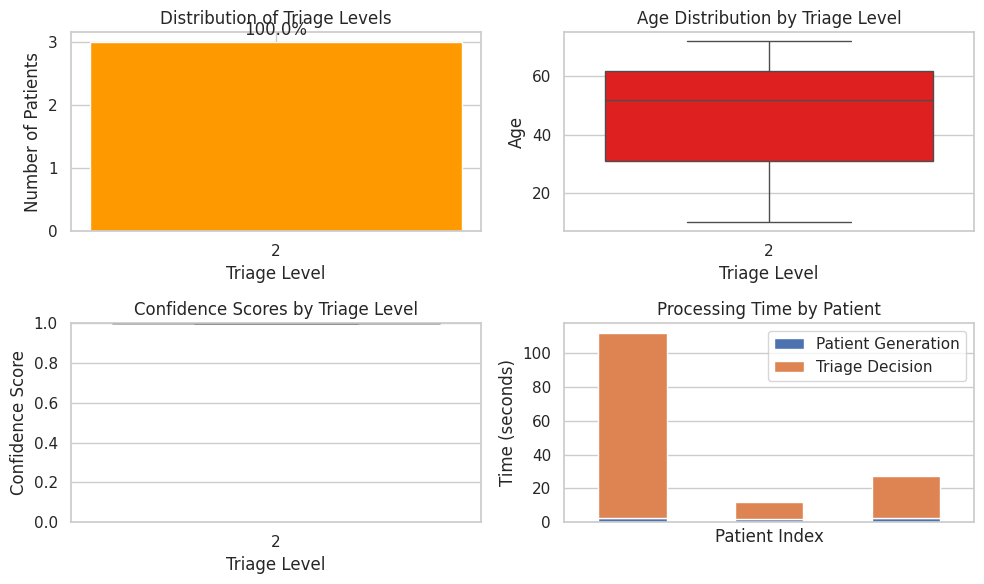


=== Key Findings ===
- Most common triage level: Level 2 (Very Urgent (Orange))
- Average model confidence: 100.0%
- Gender distribution: {'Male': 3}
- Top chief complaints: Right hip pain after a fall, Abdominal pain, Right knee pain and swelling
- Total processing time for all 3 patients: 151.23 seconds


In [11]:
# Run the experiment with 10 synthetic patients
# Uncomment to run the experiment
results = run_triage_experiment(num_patients=3, verbose=True)
analyze_results(results)


<div style="background-color: #f5f0fa; border-radius: 10px; padding: 20px; margin-bottom: 25px; border: 1px solid #9c27b0;">
<h2 style="color: #6a1b9a; margin-top: 0; padding-bottom: 10px; border-bottom: 2px solid #9c27b0;">✋ Hands-On Assignment</h2>
<p>Submit your observations about the benefits and shortcomings of using LLMs for medical triage. Consider what else could be done to improve the system.</p>
<h3 style="color: #6a1b9a; margin-top: 20px;">Tasks:</h3>
<ol>
    <li style="margin-bottom: 10px;"><strong>Prompt Engineering:</strong> Modify prompts for both models and observe impact on results.<br>
    <em>Prompt design has a significant effect on output quality and consistency. Try various approaches and document differences.</em></li>
<li style="margin-bottom: 10px;"><strong>Model Comparison:</strong> Test different OpenAI and Gemini models.<br>
<em>Compare results using <a href="https://platform.openai.com/docs/models" style="color: #6a1b9a;">OpenAI models</a> and <a href="https://ai.google.dev/models/gemini" style="color: #6a1b9a;">Gemini models</a>.</em></li>

<li style="margin-bottom: 10px;"><strong>Documentation:</strong> Submit your observations as a discussion post.<br>
<em>Include screenshots of chart results to support your findings and recommendations.</em></li>
</ol>

<h4 style="color: #6a1b9a; margin-top: 0;">Reflection Questions:</h4>
<ul>
    <li>What are the most promising benefits of AI-assisted triage?</li>
    <li>What are the concerning limitations or risks?</li>
    <li>How might the human-in-the-loop approach be further optimized?</li>
    <li>What additional data or features would improve model performance?</li>
</ul>
</div>
</div>